---
Project Repository

Project Assessment for <em><strong>Applied Statistics</strong></em> module on <em><strong>Higher Diploma in Science in Computing in Data Analytics at ATU</strong></em>. 

Submitted by: Agnieszka Waszczuk 

Lecturer: Ian McLoughlin

---

<img src="photo1.jpg" width="800">



### Table of Contents

* Problem Statement 
* Introduction 
* Software Libraries
* Data Descriptions 
* $t$-test
* References


 

## Problem Statement

Analyze the PlantGrowth R dataset. You will find a [short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html ) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/). The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups <code>trt1</code> and <code>trt2</code>.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups <code>ctrl</code>, <code>trt1</code>, and <code>trt2</code>.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Introduction

## Software Libraries


* [Pandas](https://pandas.pydata.org/) is an open source data analysis and manipulation tool,
built on top of the Python programming language.
* [Seborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* [Matplotlib](https://matplotlib.org/)  is a comprehensive library for creating static, animated, and interactive visualizations in Pytho



In [1]:
# Data frames.
import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
# Read the dataset.
plant_growth = pd.read_csv('PlantGrowth.csv', header=None)

In [3]:
plant_growth = pd.read_csv('PlantGrowth.csv')
print(plant_growth)

    rownames  weight group
0          1    4.17  ctrl
1          2    5.58  ctrl
2          3    5.18  ctrl
3          4    6.11  ctrl
4          5    4.50  ctrl
5          6    4.61  ctrl
6          7    5.17  ctrl
7          8    4.53  ctrl
8          9    5.33  ctrl
9         10    5.14  ctrl
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


### Description of the Dataset

The data set plant_growth, contains three columns:

* rownames: Appears to be a numeric identifier for each observation 
* weight: The measured growth of plants 
* group: The treatment group for the plants 

In [4]:
# Display information about the dataset. 
plant_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [5]:
# Count of observations in each group.
print("\nCount of Observations by Group:")
print(plant_growth['group'].value_counts())


Count of Observations by Group:
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


There are three groups:

* <code>ctrl</code>: Control group (10 observations).
* <code>trt1</code>: Treatment group 1 (10 observations).
* <code>trt2</code>: Treatment group 2 (10 observations).

In [6]:
# Checking for null entries in each column.
null_counts = plant_growth.isnull().sum()

# Display the count of null values in each column.
print("Null counts in each column:")
print(null_counts)

#ref: https://www.geeksforgeeks.org/how-to-count-the-number-of-nan-values-in-pandas/

Null counts in each column:
rownames    0
weight      0
group       0
dtype: int64


In [7]:
# Checking first few rows.
plant_growth.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [8]:
# Printing summary of dataset.
plant_growth.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


###  Data Visualisation 

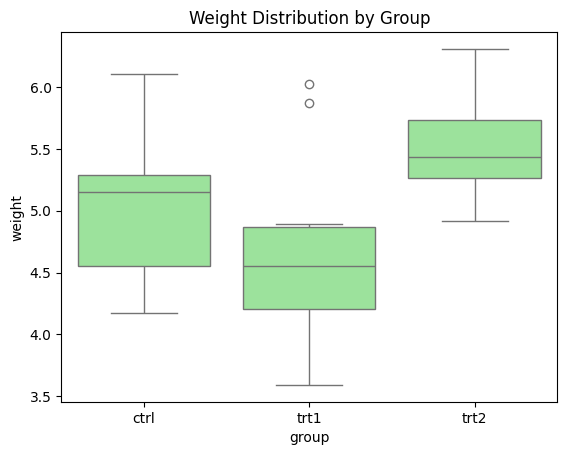

In [9]:
# Box plot.
sns.boxplot(x='group', y='weight', data=plant_growth, color="lightgreen")
# Adding title.
plt.title('Weight Distribution by Group')
# Show the plot.
plt.show()

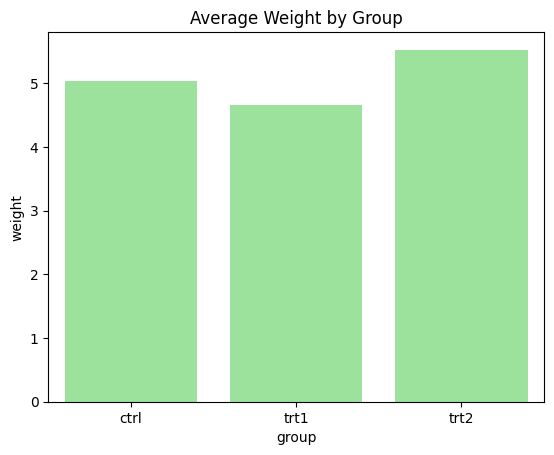

In [10]:
# Bar plot of means.
avg_weight = plant_growth.groupby('group')['weight'].mean().reset_index()
sns.barplot(x='group', y='weight', data=avg_weight, color="lightgreen")
# Adding title.
plt.title('Average Weight by Group')
# Show the plot.
plt.show()

### $t$-test

A $t$-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another</p>

 <p>t-test is a statistical test used to test whether the difference between the response of two groups is statistically significant or not. It is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. It is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known (typically, the scaling term is unknown and is therefore a nuisance parameter). When the scaling term is estimated based on the data, the test statistic—under certain conditions—follows a Student's t distribution. The t-test's most common application is to test whether the means of two populations are significantly different. In many cases, a Z-test will yield very similar results to a t-test because the latter converges to the former as the size of the dataset increases

Ref: https://www.scribbr.com/statistics/t-test/
Ref: https://en.wikipedia.org/wiki/Student%27s_t-test


### References

### End.